<h1 align="center">Banana Quality Classification.</h1>
<br>
<br>

<img src="./bananapic.jpg" align="center">

This project aims to classify the quality of bananas using Logistic Regression and Decision Tree. The dataset consists of images of bananas categorized into two classes: "Banana_Bad" and "Banana_Good". The goal is to build and evaluate models to accurately classify the quality of the bananas.

## 1. Data Loading and Exploration

The first step involves loading and exploring the dataset. The images and corresponding labels are loaded into the variables `X` and `y`. The dataset is then visualized by displaying the first and last three images.

## 2. Data Preprocessing

To prepare the data for modeling, the images are resized to a specific size using the `resize` function. After resizing, the images are flattened and normalized by dividing the pixel values by 255.0.

## 3. Model Training and Evaluation

Two classification models are trained and evaluated: logistic regression and decision tree classifier.

- Models are trained on the preprocessed data.
- Predictions are made on the training, validation, and test sets, and accuracy scores are calculated for each set.
- Precision and recall scores are calculated for the test set
- The accuracy, precision, and recall scores for the models are printed.

## 4. Model Comparison with K-Fold Cross-Validation

To further evaluate the models and compare their performances, k-fold cross-validation is used.

- The data is split into k folds, and for each fold, the logistic regression and decision tree models are trained and evaluated.
- Accuracy scores are calculated for the training, validation, and test sets of each fold.
- Precision and recall scores are calculated for the test set of each fold.
- The average accuracy, precision, and recall scores across all folds are calculated for both models and printed.

By comparing the accuracy, precision, and recall scores of the models on different evaluation sets and with k-fold cross-validation, we gain insights into their performance and can choose the model that best suits our banana quality classification task.

## 5. Decision Tree Depth Analysis

To prevent overfitting and find the optimal depth for the decision tree, we train decision tree classifiers with various depths. The depth of the tree is adjusted from 2 to 20 with a step of 2. We evaluate the models on the training, validation, and test sets, calculating the accuracy, precision, and recall for each depth.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.io import imread_collection
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import zipfile as zf

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

In [2]:
with zf.ZipFile("Banana_Bad.zip", 'r') as files:
    files.extractall('Banana_Bad')

with zf.ZipFile("Banana_Good.zip", 'r') as files:
    files.extractall('Banana_Good')

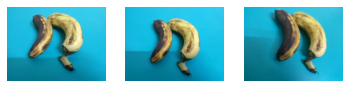

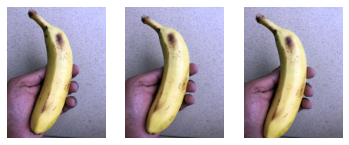

In [3]:
path = "/notebooks/ML_w_python_project"
class_names = ["Banana_Bad", "Banana_Good"]

images = []
labels = []

#Load images and labels
for index, class_name in enumerate(class_names):
    class_path = f"{path}/{class_name}/{class_name}/*"
    class_images = imread_collection(class_path)
    images.extend(class_images)
    labels.extend([index] * len(class_images))
    
X = np.array(images, dtype=object)
y = np.array(labels)

#Display the first 3 images
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i])
    plt.axis('off')
    
plt.show()
    
#Display the last 3 images
for i in range(len(X)-3, len(X)):
    plt.subplot(1, 3, len(X)-i)
    plt.imshow(X[i])
    plt.axis('off')

plt.show()

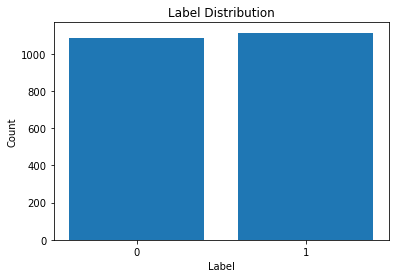

In [4]:
#Visualize distribution of labels
unique_labels, label_counts = np.unique(y, return_counts=True)

plt.bar(unique_labels, label_counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(unique_labels)
plt.show()

In [5]:
def preprocess(X):
    #Resize images
    image_size = (64, 64)
    X_resized = [resize(image, image_size) for image in X]

    #Flatten image data
    X_flat = np.array([image.flatten() for image in X_resized])

    #Normalize pixel values
    return X_flat / 255.0
    
X_normalized = preprocess(X)

In [6]:
#split the dataset into train, validation, and test sets with sizes 70%, 15%, and 15%, respectively
X_train, X_rest, y_train, y_rest = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

#Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predict using logistic regression
y_pred_train = logreg.predict(X_train)
y_pred_val = logreg.predict(X_val)
y_pred_test = logreg.predict(X_test)

#Calculate accuracy for logistic regression
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision and recall for logistic regression
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

#Print the accuracy, precision and recall values for logistic regression
print("Logistic Regression - Train Accuracy:", accuracy_train)
print("Logistic Regression - Validation Accuracy:", accuracy_val)
print("Logistic Regression - Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)

Logistic Regression - Train Accuracy: 0.8577922077922078
Logistic Regression - Validation Accuracy: 0.8727272727272727
Logistic Regression - Test Accuracy: 0.8242424242424242
Precision: 0.7626262626262627
Recall: 0.9320987654320988


In [7]:
#Train decision tree classifier model
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)

#Predict using decision tree classifier
y_pred_train = Dtree.predict(X_train)
y_pred_val = Dtree.predict(X_val)
y_pred_test = Dtree.predict(X_test)

#Calculate accuracy for decision tree classifier
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision and recall for decision tree classifier
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

#Print the accuracy, precision and recall values for decision tree classifier
print("Decision Tree - Train Accuracy:", accuracy_train)
print("Decision Tree - Validation Accuracy:", accuracy_val)
print("Decision Tree - Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)

Decision Tree - Train Accuracy: 1.0
Decision Tree - Validation Accuracy: 0.9303030303030303
Decision Tree - Test Accuracy: 0.9303030303030303
Precision: 0.9316770186335404
Recall: 0.9259259259259259


### Next, we evaluate the performance of logistic regression and decision tree using k-fold cross-validation to get more robust performance estimates

In [8]:
#Define the number of folds
k = 5

#Initialize KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

#Initialize lists to store accuracy, precision and recall, values for each fold
accuracy_train_logreg = []
accuracy_val_logreg = []
accuracy_test_logreg = []
precision_logreg = []
recall_logreg = []

accuracy_train_tree = []
accuracy_val_tree = []
accuracy_test_tree = []
precision_tree = []
recall_tree = []
depths = []

#Iterate over each fold
for train_index, val_index in kf.split(X_normalized):
    #Split the data into training, validation, and test sets
    X_train, X_rest = X_normalized[train_index], X_normalized[val_index]
    y_train, y_rest = y[train_index], y[val_index]
    
    #Further split the rest into validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)
    
    #Train logistic regression model
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    #Predict using logistic regression
    y_pred_train = logreg.predict(X_train)
    y_pred_val = logreg.predict(X_val)
    y_pred_test = logreg.predict(X_test)
    
    #Calculate accuracy for logistic regression
    accuracy_train_fold = accuracy_score(y_train, y_pred_train)
    accuracy_val_fold = accuracy_score(y_val, y_pred_val)
    accuracy_test_fold = accuracy_score(y_test, y_pred_test)
    
    # Calculate precision and recall for logistic regression
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    #Store the accuracy values for each fold
    accuracy_train_logreg.append(accuracy_train_fold)
    accuracy_val_logreg.append(accuracy_val_fold)
    accuracy_test_logreg.append(accuracy_test_fold)
    precision_logreg.append(precision)
    recall_logreg.append(recall)
    
    #Train decision tree classifier model
    Dtree = DecisionTreeClassifier()
    Dtree.fit(X_train, y_train)
    
    # Get the depth of the decision tree
    tree_depth = Dtree.tree_.max_depth
    
    #Predict using decision tree classifier
    y_pred_train = Dtree.predict(X_train)
    y_pred_val = Dtree.predict(X_val)
    y_pred_test = Dtree.predict(X_test)
    
    #Calculate accuracy for decision tree classifier
    accuracy_train_fold = accuracy_score(y_train, y_pred_train)
    accuracy_val_fold = accuracy_score(y_val, y_pred_val)
    accuracy_test_fold = accuracy_score(y_test, y_pred_test)
    
    # Calculate precision and recall for decsion tree classifier
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    #Store the accuracy values for each fold
    accuracy_train_tree.append(accuracy_train_fold)
    accuracy_val_tree.append(accuracy_val_fold)
    accuracy_test_tree.append(accuracy_test_fold)
    precision_tree.append(precision)
    recall_tree.append(recall)
    depths.append(tree_depth)

#Calculate the average accuracy, precision and recall across all folds for logistic regression
avg_accuracy_train = np.mean(accuracy_train_logreg)
avg_accuracy_val = np.mean(accuracy_val_logreg)
avg_accuracy_test = np.mean(accuracy_test_logreg)
avg_precision = np.mean(precision_tree)
avg_recall = np.mean(recall_tree)

#Print the average accuracy, precision and recall values across all folds for logistic regression
print("Logistic Regression - Average Train Accuracy:", avg_accuracy_train)
print("Logistic Regression - Average Validation Accuracy:", avg_accuracy_val)
print("Logistic Regression - Average Test Accuracy:", avg_accuracy_test)
print("Logistic Regression - Average Precision:", avg_precision)
print("Logistic Regression - Average Recall:", avg_recall)

print("\n")

#Calculate the average accuracy, precision, and recall across all folds for decision tree
avg_accuracy_train = np.mean(accuracy_train_tree)
avg_accuracy_val = np.mean(accuracy_val_tree)
avg_accuracy_test = np.mean(accuracy_test_tree)
avg_precision = np.mean(precision_tree)
avg_recall = np.mean(recall_tree)

avg_depth = np.mean(depths)

#Print the average accuracy, Precision, and Recall values across all folds for decision tree
print("Decision Tree - Average Train Accuracy:", avg_accuracy_train)
print("Decision Tree - Average Validation Accuracy:", avg_accuracy_val)
print("Decision Tree - Average Test Accuracy:", avg_accuracy_test)
print("Decision Tree - Average Precision:", avg_precision)
print("Decision Tree - Average Recall:", avg_recall)

#Print average depth of trees
print("Decision Tree - Average Depth:", avg_depth)

Logistic Regression - Average Train Accuracy: 0.860568181818182
Logistic Regression - Average Validation Accuracy: 0.8581818181818182
Logistic Regression - Average Test Accuracy: 0.8581818181818182
Logistic Regression - Average Precision: 0.9223971531867676
Logistic Regression - Average Recall: 0.9456002085476349


Decision Tree - Average Train Accuracy: 1.0
Decision Tree - Average Validation Accuracy: 0.9400000000000001
Decision Tree - Average Test Accuracy: 0.9372727272727273
Decision Tree - Average Precision: 0.9223971531867676
Decision Tree - Average Recall: 0.9456002085476349
Decision Tree - Average Depth: 12.2


## Decision Tree seems to reach better accuracy than Logistic Regression.  Next, we train decision tree on different depths to prevent overfitting

In [9]:
X_train, X_rest, y_train, y_rest = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

for depth in range(2, 21, 2):
    #Train decision tree
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    #Predict
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    
    #Calculate accuracy, precision, and recall
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)


    #Print the accuracy, precision, and recall values
    print(f"Depth: {depth} - Training Accuracy: {accuracy_train}")
    print(f"Depth: {depth} - Validation Accuracy: {accuracy_val}")
    print(f"Depth: {depth} - Test Accuracy: {accuracy_test}")
    print(f"Depth: {depth} - Precision: {precision}")
    print(f"Depth: {depth} - Recall: {recall}")
    print("\n")


Depth: 2 - Training Accuracy: 0.8389610389610389
Depth: 2 - Validation Accuracy: 0.8242424242424242
Depth: 2 - Test Accuracy: 0.8303030303030303
Depth: 2 - Precision: 0.8732394366197183
Depth: 2 - Recall: 0.7654320987654321


Depth: 4 - Training Accuracy: 0.9344155844155844
Depth: 4 - Validation Accuracy: 0.9090909090909091
Depth: 4 - Test Accuracy: 0.8939393939393939
Depth: 4 - Precision: 0.8895705521472392
Depth: 4 - Recall: 0.8950617283950617


Depth: 6 - Training Accuracy: 0.9837662337662337
Depth: 6 - Validation Accuracy: 0.9393939393939394
Depth: 6 - Test Accuracy: 0.906060606060606
Depth: 6 - Precision: 0.906832298136646
Depth: 6 - Recall: 0.9012345679012346


Depth: 8 - Training Accuracy: 0.9961038961038962
Depth: 8 - Validation Accuracy: 0.9333333333333333
Depth: 8 - Test Accuracy: 0.9272727272727272
Depth: 8 - Precision: 0.9259259259259259
Depth: 8 - Recall: 0.9259259259259259


Depth: 10 - Training Accuracy: 0.9987012987012988
Depth: 10 - Validation Accuracy: 0.9424242424242

In [10]:
#Based on the accuracy, precision, and recall values of different depths, it is hard to tell which depth would be
#the best fit. Thus we will choose the final model to be decision tree with max_depth=None

#Train decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Predict using decision tree classifier
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

#Calculate accuracy for decision tree classifier
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision and recall for decision tree classifier
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

#Print the accuracy, precision and recall values for decision tree classifier
print("Decision Tree - Train Accuracy:", accuracy_train)
print("Decision Tree - Validation Accuracy:", accuracy_val)
print("Decision Tree - Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("Depth:", model.tree_.max_depth)

Decision Tree - Train Accuracy: 1.0
Decision Tree - Validation Accuracy: 0.9333333333333333
Decision Tree - Test Accuracy: 0.9242424242424242
Precision: 0.9202453987730062
Recall: 0.9259259259259259
Depth: 12


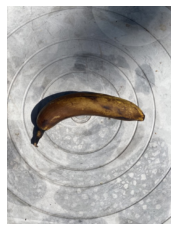

Predicted class: Banana_Bad


In [11]:
from PIL import Image

# Load and preprocess the image
image_path = "./test.jpeg"
image = Image.open(image_path)

plt.subplot(1, 1, 1)
plt.imshow(image)
plt.axis('off')
    
plt.show()

image = image.resize((64, 64))  # Resize the image to match the input size
image = np.array(image)
image = image.flatten()  # Flatten the image data
image = image / 255.0  # Normalize the pixel values

# Reshape the image to match the input shape expected by the model
image = image.reshape(1, -1)

# Feed the image to the model and obtain the prediction
prediction = model.predict(image)


# Interpret the prediction
#class_names = ["Banana_Bad", "Banana_Good"]
predicted_class = class_names[prediction[0]]
print("Predicted class:", predicted_class)